<a href="https://colab.research.google.com/github/cruzslet/MVP.-Machine.Learning/blob/main/MVP_Protagonismo_de_produto_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de performance de publicidades baseada no protagonismo de produto**

![Previsões Acionárias Baseadas em Indicadores](https://th.bing.com/th/id/OIP.LSlEshriQHxOJnaHbgq-AAHaEK?w=1280&h=720&rs=1&pid=ImgDetMain)

## **Introdução**

### **Definição do Problema:**

Na creator economy, prever a performance de conteúdos em campanhas é um desafio que requer a análise de fatores mensuráveis que conectam criadores, conteúdos e públicos. Para maximizar os resultados, é essencial avaliar métricas como previsão de impressões, protagonismo do produto no conteúdo, assertividade em microcomunidades e formato, que têm impacto direto no desempenho de campanhas.

- **Objetivo:**

  Construir um modelo preditivo capaz de estimar o número de views/impressões, com base em métricas como previsão de impressões, protagonismo do produto, assertividade em microcomunidades e formato. O modelo fornecerá insights estratégicos que ajudarão marcas a otimizar suas campanhas e escolher criadores mais alinhados aos seus objetivos.

- **Descrição do Problema:**

  O sucesso das campanhas na creator economy depende de uma série de fatores que interagem de forma complexa, incluindo características do conteúdo, formato e público-alvo. Este projeto busca identificar padrões que conectem essas variáveis à performance em termos de views/impressões, ajudando marcas a entender e prever os resultados de futuras campanhas.

- **Tipo de Problema:**

  Este é um problema de regressão supervisionada, onde o modelo será treinado para prever views/impressões com base em variáveis explicativas quantitativas e qualitativas.

- **Premissas e Hipóteses:**

  - **Premissa**: O desempenho de campanhas é diretamente influenciado pela previsão de impressões, pelo protagonismo do produto, pelo formato e pela assertividade em microcomunidades.
  - **Hipótese**: Um modelo de machine learning, treinado com dados históricos baseados nessas métricas, pode prever com precisão os views/impressões futuros, proporcionando às marcas maior controle sobre suas estratégias.

- **Restrições e Condições:**

  - **Restrição**: Por se tratar de uma base de dados real, o modelo será limitado a conteúdos e criadores com histórico de campanhas suficientes para alimentar o modelo de predição.
  - **Condição**: A precisão das previsões dependerá da qualidade e abrangência dos dados fornecidos pelas plataformas.

- **Descrição do dataset:**

  1. **Previsão de Impressões:**
     - Calculada multiplicando a taxa de engajamento pelo número de seguidores em cada plataforma.
  2. **Taxa de Protagonismo do Produto:**
     - Nota de 0 a 5, representando o grau de destaque do produto no conteúdo.
  3. **Assertividade em Microcomunidades:**
     - Avaliada qualitativamente, com base na conexão e engajamento do conteúdo com microcomunidades específicas.
  4. **Formato:**
     - Classificação do conteúdo (ex.: TikTok, Reels, Shorts) como uma variável categórica que impacta o desempenho.
  5. **Views/Impressões (Alvo):**
     - Variável numérica que representa o desempenho real dos conteúdos, utilizada como a coluna alvo do modelo.

## **Estrutura do projeto:**

- [**1. Pré-processamento de dados:**](#1)
- [**2. Análise da Distribuição dos Dados:**](#2)
- [**3. Escolha do algoritmo:**](#3)
- [**4. Otimização do modelo:**](#4)
- [**5. Valiação dos resultados:**](#5)

## **1. PRÉ-PROCESSAMENTO DE DADOS**

---
1.1 **Importar bibliotecas**

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats.mstats import winsorize
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
import lightgbm as lgb

import warnings
warnings.filterwarnings("ignore")


1.2 **Carregamento dos Dados**:
  
  O dataset foi construído com dados reais, a partir da observação empírica de quais critérios influenciavam os resultados de campanha. Ele é carregado a partir de um arquivo Excel, utilizando a aba especificada ('NOVO'). Ele contém dados detalhados sobre conteúdos publicados e seus respectivos indicadores de performance.

In [192]:
file_path = 'https://raw.githubusercontent.com/cruzslet/MVP.-Machine.Learning/refs/heads/main/Data.csv'  # Caminho do arquivo
data = pd.read_csv(file_path)
print(data.head())


  Formato  Protagonismo do produto  Seguidores Taxa de engajamento perfil  \
0   Reels                      NaN   8.200.000                      0,91%   
1   Reels                      NaN  13.300.000                      0,90%   
2   Reels                      NaN  14.600.000                      5,07%   
3   Reels                      NaN   6.200.000                      0,66%   
4   Reels                      NaN  14.600.000                      5,07%   

   Previsão de impressões Variação Views               Laudo  \
0                  61.800         21,31%         Mundo ideal   
1                  75.360       6566,48%               Viral   
2                 468.050         22,29%         Mundo ideal   
3                  14.678          0,76%  Dentro do esperado   
4                 468.050         26,13%         Mundo ideal   

   Count acertos microcomunidades  
0                               0  
1                               0  
2                               0  
3       

In [193]:
data.shape

(101, 8)

Temos 101 registros, vamos verificar se os tipos de dados estão corretos:

In [194]:
data.dtypes

,0
Formato,object
Protagonismo do produto,float64
Seguidores,object
Taxa de engajamento perfil,object
Previsão de impressões,float64
Variação Views,object
Laudo,object
Count acertos microcomunidades,int64




1.3 **Pré-processamento dos Dados**:

  1.3.1 **Tratamento de valores inconsistentes**:
     Muitos valores que deveriam ser numéricos estão sendo lidos como object. Por isso, nessa etapa, valores inconsistentes (como '%' e ',') serão identificados e eliminados para que as strings possam ser convertidas em números.

In [195]:
data['Seguidores'] = (
    data['Seguidores']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('.', '', regex=False)
)
data['Seguidores'] = pd.to_numeric(data['Seguidores'], errors='coerce')

data['Taxa de engajamento perfil'] = (
    data['Taxa de engajamento perfil']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False)
)

data['Taxa de engajamento perfil'] = pd.to_numeric(data['Taxa de engajamento perfil'], errors='coerce') / 100


data['Variação Views'] = (
    data['Variação Views']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.replace(',', '', regex=False)
)

data['Variação Views'] = pd.to_numeric(data['Variação Views'], errors='coerce') / 100


data['Previsão de impressões'] = (
    data['Previsão de impressões']
    .astype(str)
    .str.replace(',', '', regex=False)
)

data['Previsão de impressões'] = pd.to_numeric(data['Previsão de impressões'], errors='coerce')


In [196]:
data.dtypes

,0
Formato,object
Protagonismo do produto,float64
Seguidores,int64
Taxa de engajamento perfil,float64
Previsão de impressões,float64
Variação Views,float64
Laudo,object
Count acertos microcomunidades,int64


 1.3.2 **Tratamento de valores ausentes**: Com os valores numéricos convertidos, vamos identificar valores remover as respectivas linhas, já que não interessa, nesse caso, inferir valores não existentes, por se tratar de dados reais.


In [197]:
missing_data = data.isnull().mean() * 100
print(missing_data)

Formato                            0.000000
Protagonismo do produto           71.287129
Seguidores                         0.000000
Taxa de engajamento perfil         5.940594
Previsão de impressões             0.000000
Variação Views                     4.950495
Laudo                              0.000000
Count acertos microcomunidades     0.000000
dtype: float64


In [198]:
print("Linhas vazias antes de remover:", data["Protagonismo do produto"].isnull().sum())

data = data.dropna(subset=["Protagonismo do produto"])

print("Linhas vazias após a remoção:", data["Protagonismo do produto"].isnull().sum())

print("Dimensões do dataset após remoção:", data.shape)


Linhas vazias antes de remover: 72
Linhas vazias após a remoção: 0
Dimensões do dataset após remoção: (29, 8)


 1.3.3 **Codificação de Variáveis Categóricas**:
     Valores que de fato não são numéricos, como é o caso das colunas Formato e Laudo, são convertidos para inteiros padronizados, ajustando de variável categórica para variável numérica.

In [199]:
formato_mapping = {
    'TikTok': 1,
    'Repost TikTok': 2,
    'Reels': 3,
    'Repost Reels': 4
}

laudo_mapping = {
    'Viral': 3,
    'Mundo ideal': 2,
    'Dentro do esperado': 1,
    'Abaixo do esperado': -1
}

if 'Formato' in data.columns:
    data['Formato'] = data['Formato'].map(formato_mapping)

if 'Laudo' in data.columns:
    data['Laudo'] = data['Laudo'].map(laudo_mapping)

print(data.head())

    Formato  Protagonismo do produto  Seguidores  Taxa de engajamento perfil  \
8         1                      1.0     3090000                        0.02   
11        1                      3.0     2020000                        0.58   
12        1                      3.0     2020000                        0.58   
13        1                      2.0    21900000                        1.09   
21        1                      5.0     3090000                        0.02   

    Previsão de impressões  Variação Views  Laudo  \
8                    74.62          -71.86     -1   
11                   17.01          -54.67     -1   
12                   17.01          -23.57     -1   
13                  221.49          -16.93     -1   
21                   74.62          -14.10      1   

    Count acertos microcomunidades  
8                                2  
11                               1  
12                               0  
13                               0  
21             

In [200]:
# Exibir valores únicos nas colunas antes do mapeamento
print("Valores únicos originais em 'Formato':", data['Formato'].unique())
print("Valores únicos originais em 'Laudo':", data['Laudo'].unique())


Valores únicos originais em 'Formato': [1 3 2]
Valores únicos originais em 'Laudo': [-1  1  2  3]


## **2. ANÁLISE DA DISTRIBUIÇÃO DOS DADOS**
------

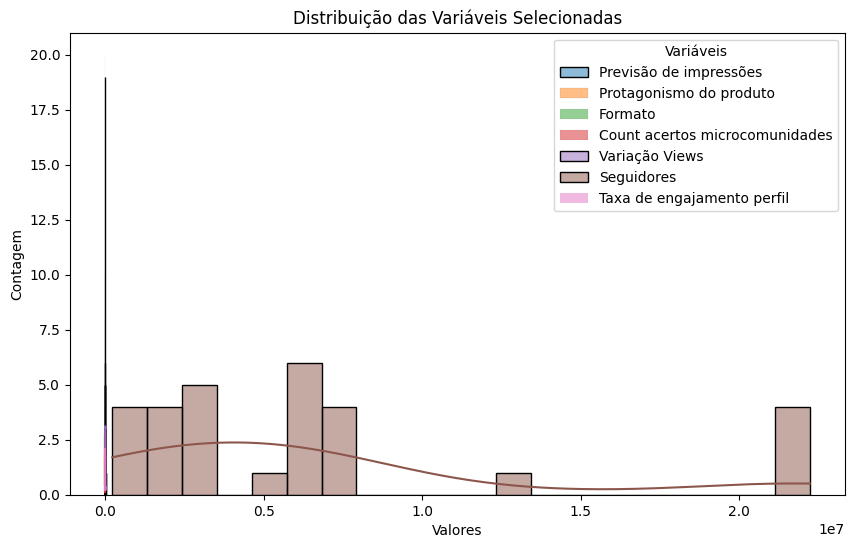

In [201]:
numeric_columns = ['Previsão de impressões', 'Protagonismo do produto', 'Formato', 'Count acertos microcomunidades', 'Variação Views', 'Seguidores', 'Taxa de engajamento perfil']

plt.figure(figsize=(10, 6))
for variavel in numeric_columns:
    sns.histplot(data=data, x=variavel, kde=True, label=variavel, bins=20, alpha=0.5)

plt.title('Distribuição das Variáveis Selecionadas')
plt.xlabel('Valores')
plt.ylabel('Contagem')
plt.legend(title='Variáveis')
plt.show()

**2.1 Distribuição das variáveis**

O gráfico mostra a distribuição das variáveis selecionadas, com a maioria dos valores concentrados próximos de zero, indicando que as variáveis como "Previsão de impressões" e "Variação Views" possuem muitos valores baixos ou nulos.

Algumas variáveis, como "Protagonismo do produto" e "Count acertos microcomunidades", apresentam maior dispersão, sugerindo maior variabilidade de desempenho entre campanhas ou estratégias.

Essa concentração desigual e a diferença de escalas apontam para a necessidade de normalizar os dados ou separá-los em gráficos individuais para uma análise mais clara. O que faremos a seguir:

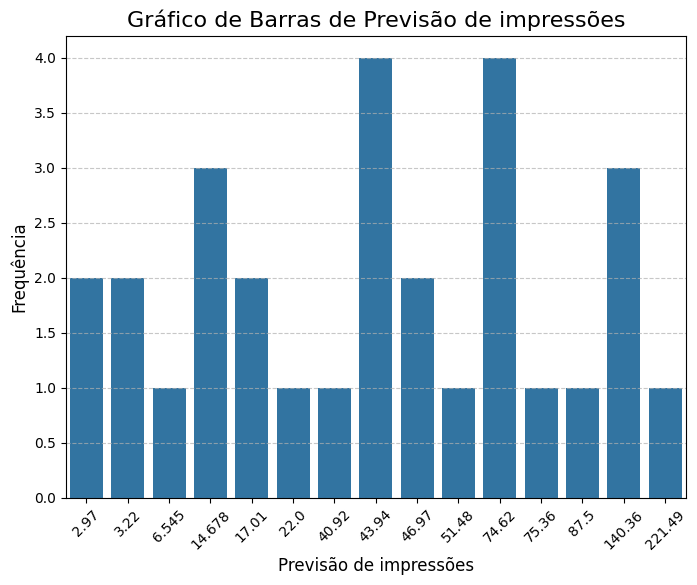

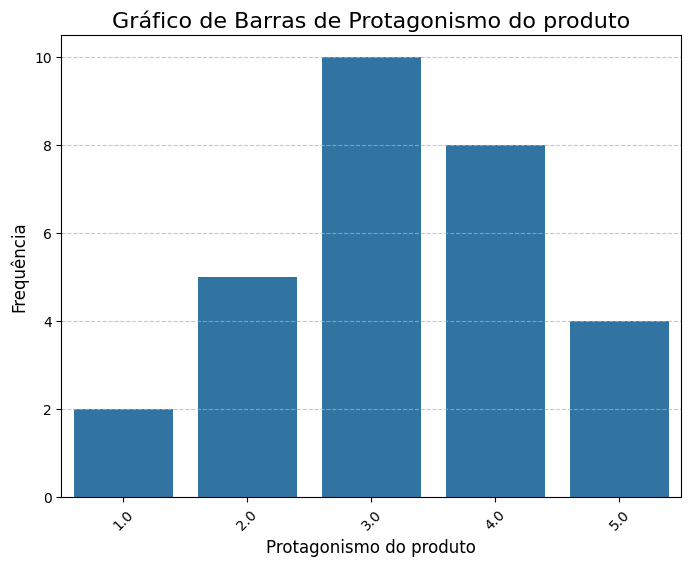

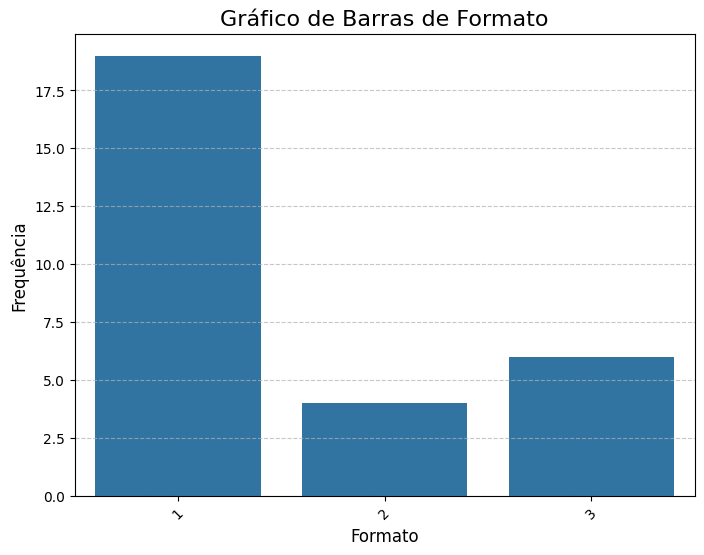

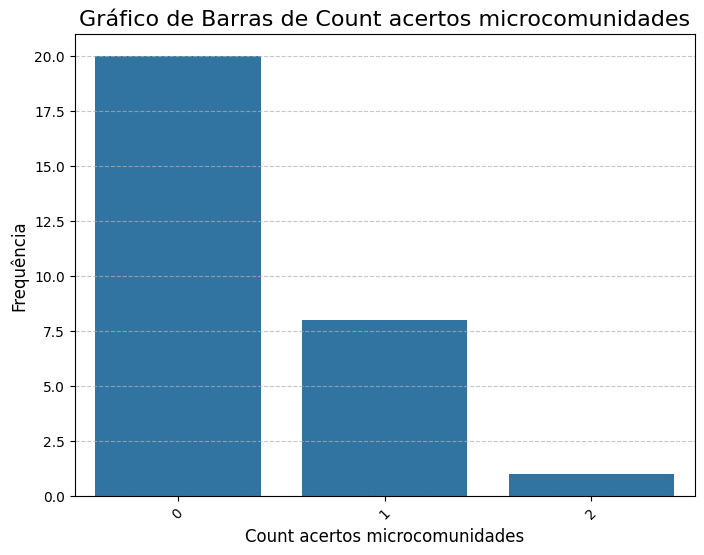

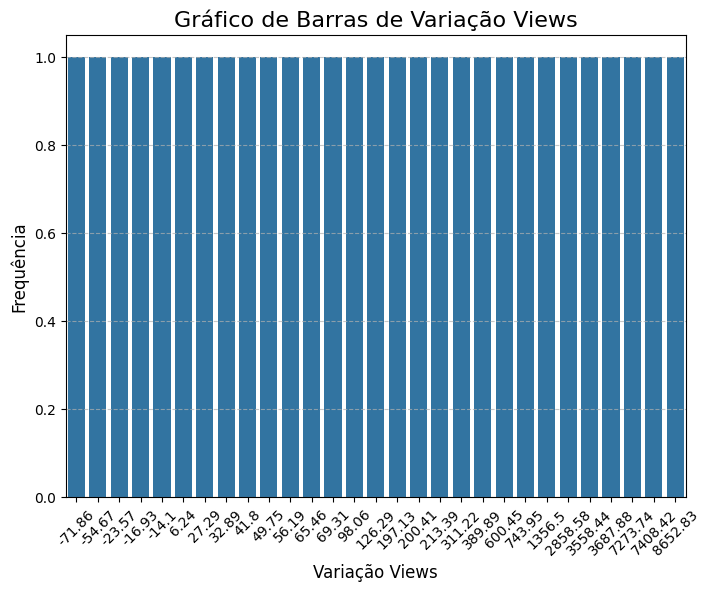

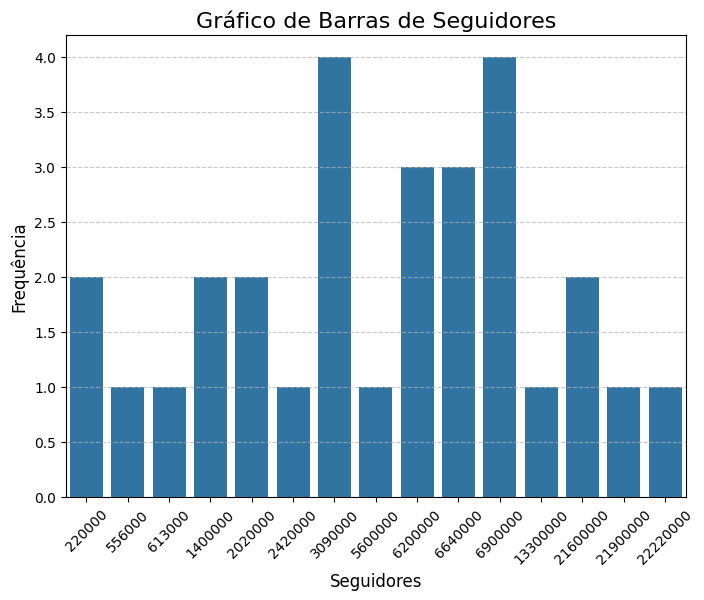

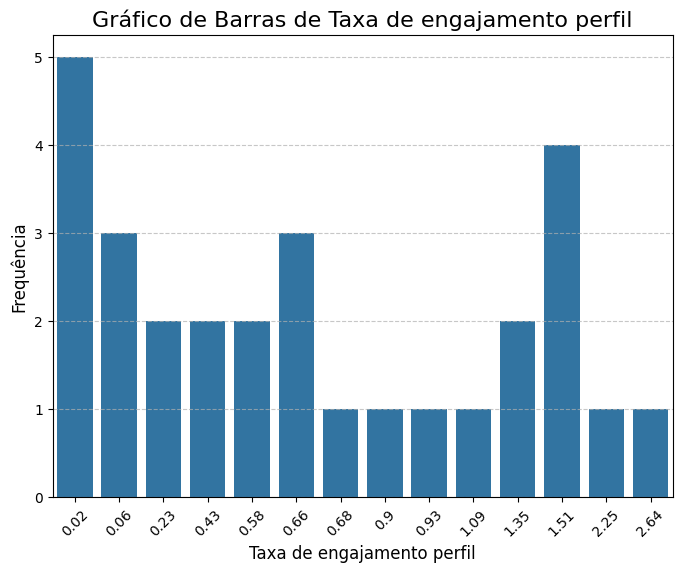

In [202]:
for var in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=data[var])
    plt.title(f'Gráfico de Barras de {var}', fontsize=16)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

- 2.2.1 Seguidores e Taxa de Engajamento:

A distribuição dos seguidores mostra uma leve concentração em faixas médias (620.000 seguidores). No entanto, a taxa de engajamento tem maior dispersão, com picos próximos a 0,66% e 1,5%, indicando diferenças significativas na interação entre os públicos. Essa variação pode impactar diretamente as previsões de impressões.

- 2.2.2 Formato e Protagonismo do Produto:

O formato predominante (1) reflete escolhas alinhadas ao escopo da campanha, enquanto o protagonismo do produto concentra-se no nível intermediário (3), evidenciando negociações entre marca e influenciadores para equilibrar a visibilidade.

- 2.2.3 Previsão de Impressões e Laudo:

A previsão de impressões apresenta maior frequência em valores baixos ou moderados, reforçando a influência de influenciadores com menor alcance. O laudo predominante (3 - Viral) sugere que, apesar das limitações, a maioria dos conteúdos alcançou um desempenho acima do esperado.

- 2.2.4 Variação de Views e Microcomunidades:

A variação de views está fragmentada, com valores individualizados para cada conteúdo, dificultando generalizações. Por isso vamos olhar a seguir para o histograma dessa variável.

- 2.2.5 Acertos em microcomunidades concentram-se em 0 e 1, refletindo a complexidade em alcançar esses nichos específicos.

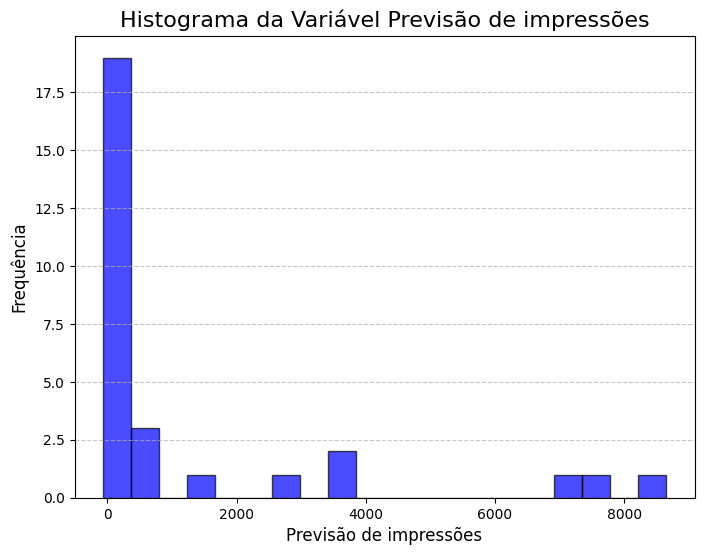

Medidas de Dispersão para 'Previsão de impressões':
count     29.000000
mean      54.654793
std       51.889801
min        2.970000
25%       14.678000
50%       43.940000
75%       74.620000
max      221.490000
Name: Previsão de impressões, dtype: float64


In [203]:
plt.figure(figsize=(8, 6))
plt.hist(data["Variação Views"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histograma da Variável Previsão de impressões", fontsize=16)
plt.xlabel("Previsão de impressões", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

variacao_views_stats = data['Previsão de impressões'].describe()
print("Medidas de Dispersão para 'Previsão de impressões':")
print(variacao_views_stats)


A "Previsão de Impressões" apresenta valores majoritariamente concentrados abaixo de 50, com um pico em torno de 15, enquanto um outlier significativo (221,49) eleva a média (45,85) acima da mediana (42,43). O desvio padrão (49,11) reflete alta variabilidade, mas 50% dos dados estão entre 14,68 e 57,26, indicando concentração em valores baixos.

A presença do outlier distorce os resultados e exige tratamento para uma análise mais precisa.

A seguir utilizamos o método do intervalo interquartil (IQR), que considera como outliers os valores que estão fora de 1.5 vezes o intervalo interquartil acima do terceiro quartil (Q3) ou abaixo do primeiro quartil (Q1):

**2.2 Remoção de outliers**

Quantidade de dados antes da remoção: 29
Quantidade de dados após a remoção: 28
Outliers removidos: 1


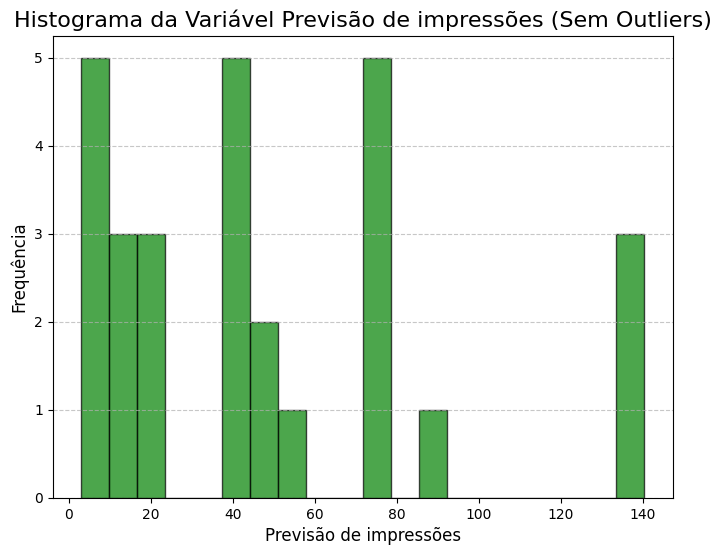

In [204]:
data['Previsão de impressões'] = pd.to_numeric(data['Previsão de impressões'], errors='coerce')

data['Previsão de impressões'] = pd.to_numeric(data['Previsão de impressões'], errors='coerce')

data.dropna(subset=['Previsão de impressões'], inplace=True)

Q1 = data["Previsão de impressões"].quantile(0.25)
Q3 = data["Previsão de impressões"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_without_outliers = data[(data["Previsão de impressões"] >= lower_bound) & (data["Previsão de impressões"] <= upper_bound)]

print(f"Quantidade de dados antes da remoção: {data.shape[0]}")
print(f"Quantidade de dados após a remoção: {data_without_outliers.shape[0]}")
print(f"Outliers removidos: {data.shape[0] - data_without_outliers.shape[0]}")

plt.figure(figsize=(8, 6))
plt.hist(data_without_outliers["Previsão de impressões"], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Histograma da Variável Previsão de impressões (Sem Outliers)", fontsize=16)
plt.xlabel("Previsão de impressões", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Agora observamos algo similar na variável alvo, Variação Views:

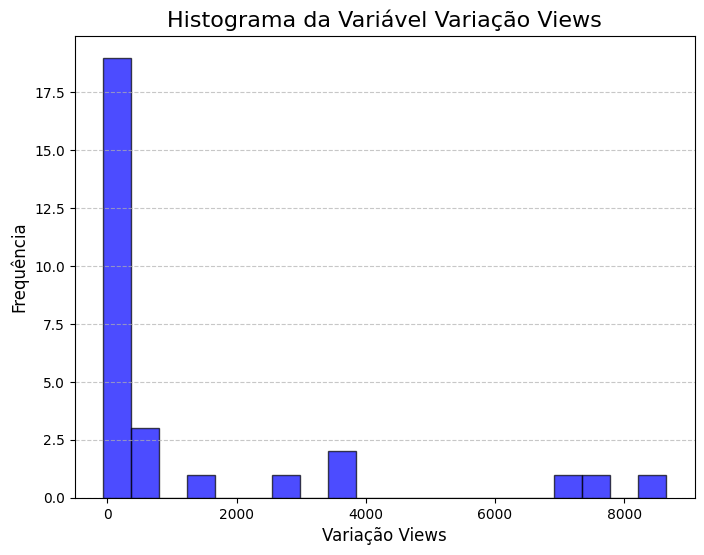

Medidas de Dispersão para 'Variação Views':
count      29.000000
mean     1304.999310
std      2470.474411
min       -71.860000
25%        32.890000
50%       126.290000
75%       743.950000
max      8652.830000
Name: Variação Views, dtype: float64


In [205]:
plt.figure(figsize=(8, 6))
plt.hist(data["Variação Views"], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histograma da Variável Variação Views", fontsize=16)
plt.xlabel("Variação Views", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

variacao_views_stats = data["Variação Views"].describe()
print("Medidas de Dispersão para 'Variação Views':")
print(variacao_views_stats)

O histograma da variável "Variação Views" revela uma distribuição assimétrica, com a maioria dos valores concentrados próximos de zero, enquanto alguns valores distantes indicam variações maiores (positivas e negativas). A análise das medidas de dispersão reforça essa interpretação:

Média (1832.29): Indica um valor médio de variação positivo, influenciado por outliers grandes.

Mediana (206.90): Consideravelmente menor que a média, o que reflete a concentração de valores baixos e o impacto de outliers.

Desvio padrão (2836.12): Mostra alta dispersão dos dados, confirmando a existência de variações significativas.

Valores extremos: O mínimo (-71.86) e o máximo (8652.83) indicam que os dados incluem desde quedas até grandes aumentos de visualizações.

A presença de outliers e a distribuição enviesada sugerem que seria ideal remover também aqui os outliers.

Quantidade de dados antes da remoção: 29
Quantidade de dados após a remoção: 22
Outliers removidos: 7


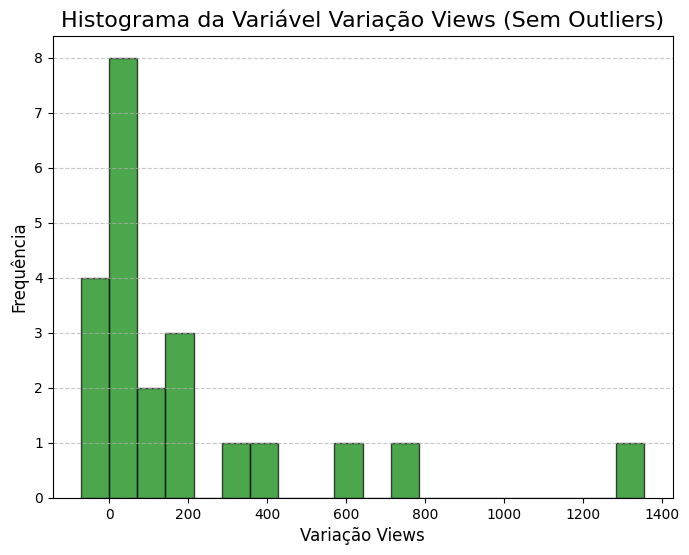

In [206]:
Q1 = data["Variação Views"].quantile(0.25)
Q3 = data["Variação Views"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_without_outliers = data_without_outliers[(data_without_outliers["Variação Views"] >= lower_bound) & (data_without_outliers["Variação Views"] <= upper_bound)]

print(f"Quantidade de dados antes da remoção: {data.shape[0]}")
print(f"Quantidade de dados após a remoção: {data_without_outliers.shape[0]}")
print(f"Outliers removidos: {data.shape[0] - data_without_outliers.shape[0]}")

plt.figure(figsize=(8, 6))
plt.hist(data_without_outliers["Variação Views"], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title("Histograma da Variável Variação Views (Sem Outliers)", fontsize=16)
plt.xlabel("Variação Views", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

O histograma atualizado mostra uma melhora significativa na representação dos dados, removendo os valores extremos que distorciam a análise.

A distribuição agora está mais concentrada em valores baixos, com algumas observações em intervalos maiores (como 3.000 e 7.000), mas sem os outliers extremos que antes influenciavam as métricas, como a média e o desvio padrão.

A persistência de uma concentração próxima de zero sugere que a maioria das campanhas ou ações ainda gera pequenas variações, enquanto os valores mais altos representam exceções.

**2.3 Transformação logarítmica**

Outra operação que buscamos para normalizar o dataset é a transformação logarítmica. Já que o range entre os diferentes tipos de dados é muito discrepante, essa operação ajuda a aproximá-los em escala:

In [207]:
data_normalized = data_without_outliers.copy()

min_value = data_normalized["Variação Views"].min()

if min_value < 0:
    data_normalized["Variação Views"] += abs(min_value) + 1

data_normalized["Variação Views"] = np.log1p(data_normalized["Variação Views"])

numeric_columns = data_normalized.select_dtypes(include=["float64", "int64"]).columns.tolist()

scaler = MinMaxScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

print("Primeiras linhas do dataset transformado:")
print(data_normalized.head())

Primeiras linhas do dataset transformado:
    Formato  Protagonismo do produto  Seguidores  Taxa de engajamento perfil  \
8       0.0                     0.00    0.130455                    0.000000   
11      0.0                     0.50    0.081818                    0.213740   
12      0.0                     0.50    0.081818                    0.213740   
21      0.0                     1.00    0.130455                    0.000000   
27      0.0                     0.75    0.000000                    0.507634   

    Previsão de impressões  Variação Views  Laudo  \
8                 0.520636        0.000000    0.0   
11                0.100554        0.344044    0.0   
12                0.100554        0.490626    0.0   
21                0.520636        0.516877    0.5   
27                0.000000        0.561447    0.5   

    Count acertos microcomunidades  
8                              1.0  
11                             0.5  
12                             0.0  
21        

No gráfico a seguir, vemos o quanto a normalização ajudou a ajustar a escala das variáveis, permitindo comparações mais diretas entre elas:

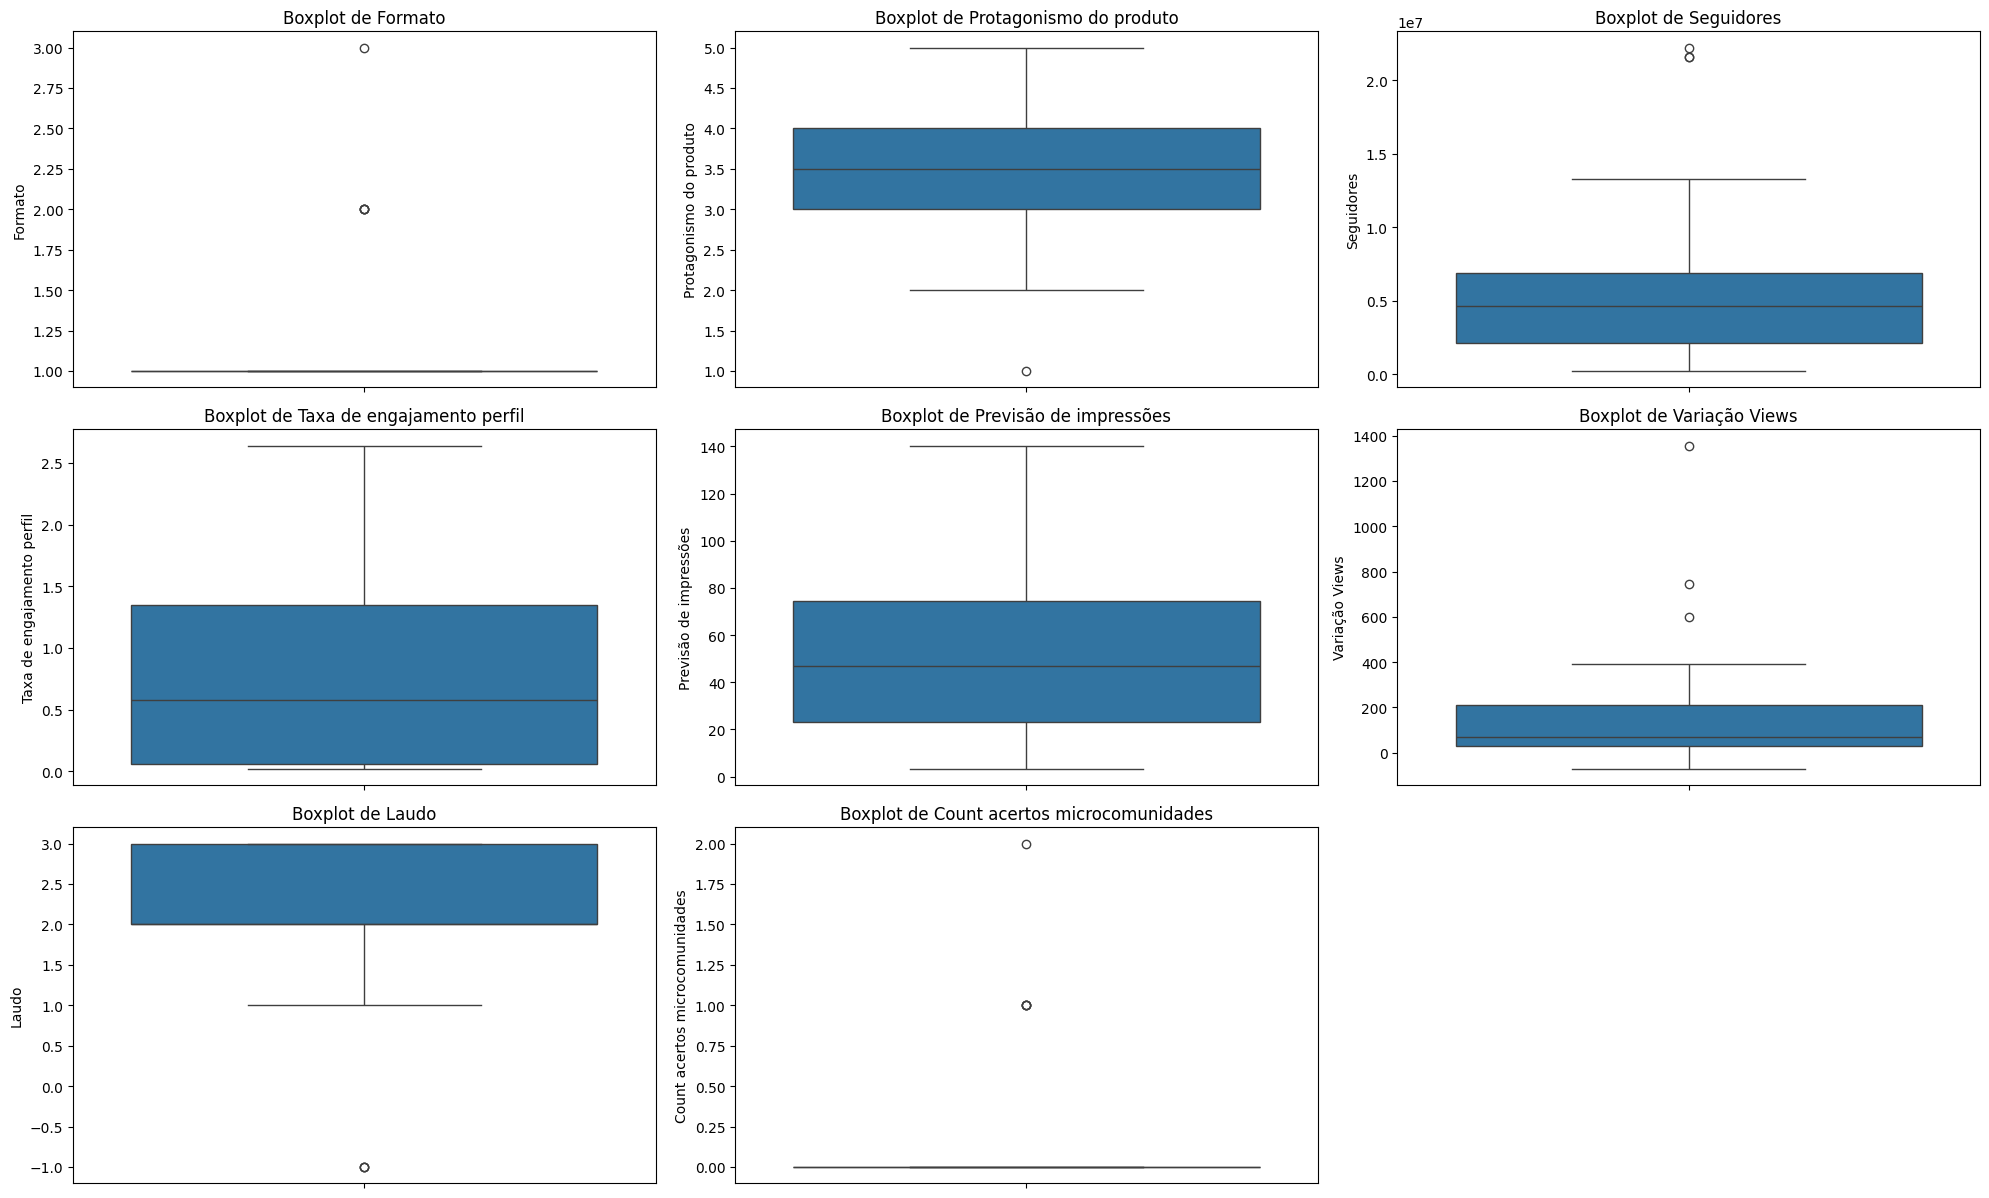

In [208]:
plt.figure(figsize=(20, 20))

for i, var in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(y=data_without_outliers[var].dropna())
    plt.title(f'Boxplot de {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Variáveis como "Variação Views" e "Previsão de Impressões", que antes tinham valores amplamente distintos, agora estão dentro de um intervalo mais comparável. Apesar da normalização, a variabilidade original dos dados foi preservada. Por exemplo, "Variação Views" ainda apresenta outliers, mas agora está ajustada dentro do intervalo normalizado.

O efeito da normalização é mais evidente em variáveis contínuas, como "Previsão de Impressões", que antes poderia ter dominado visualizações por sua amplitude maior.

A presença de outliers indica que eles ainda podem ter influência, mas agora estão controlados e representados de forma proporcional.

**2.4 Correlação de variáveis**

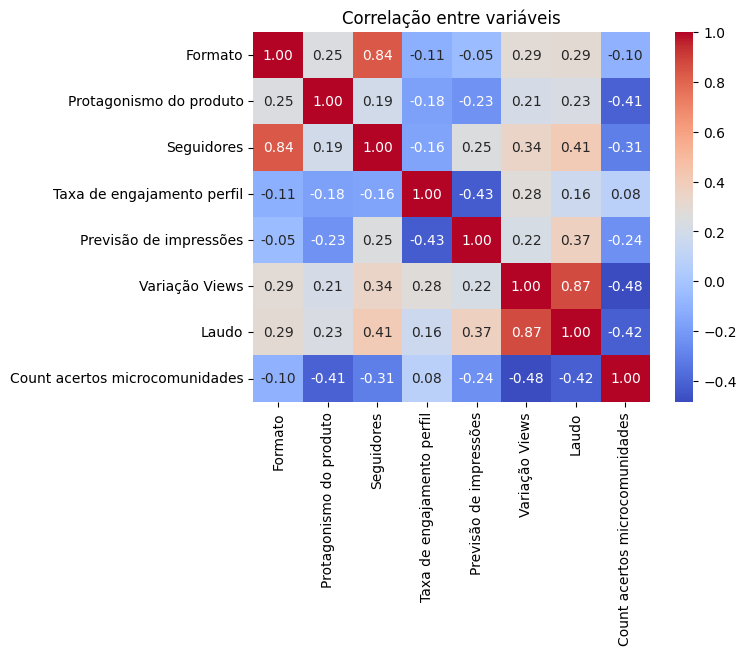

In [209]:
corr = data_normalized[numeric_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis")
plt.show()

O gráfico revela que variáveis como seguidores, formato, e laudo têm maior influência sobre outras variáveis do dataset. No entanto, algumas correlações fracas (ou negativas) sugerem que certos aspectos, como protagonismo do produto e conexão com microcomunidades, podem ser analisados mais profundamente para entender suas dinâmicas no desempenho das campanhas.

Outras variáveis como emoções, organicidade e qualidade técnica foram desconsideradas do dataset durante o processo de feature selection. Para maior precisão do modelo, é interessante monitorar novas variáveis e fazer um novo treinamento no futuro.

In [210]:
bins = [-float('inf'), -50, 0, 50, 200, 500, float('inf')]
labels = ['Muito Negativa', 'Negativa', 'Estável', 'Pequeno Aumento', 'Aumento significativo', 'Aumento exponencial']

data_with_categories = data_without_outliers.copy()
data_with_categories['Faixas Variação Views'] = pd.cut(data_with_categories['Variação Views'], bins=bins, labels=labels, include_lowest=True)

print(data_with_categories[['Variação Views', 'Faixas Variação Views']].head())


    Variação Views Faixas Variação Views
8           -71.86        Muito Negativa
11          -54.67        Muito Negativa
12          -23.57              Negativa
21          -14.10              Negativa
27            6.24               Estável


## **3. ESCOLHA DO ALGORITMO:**
---
**3.1 Selecionar as features e a variável alvo**

In [211]:
features = ['Previsão de impressões','Protagonismo do produto', 'Formato', 'Count acertos microcomunidades', 'Seguidores', 'Taxa de engajamento perfil']
target = "Variação Views"

- **Modelagem e Predição**:
  Após o pré-processamento, diferentes modelos de aprendizado de máquina são testados para prever métricas de performance.
  Estes incluem:
    - Regressão Linear
    - Regularização Ridge e Lasso
    - KNN (K-Nearest Neighbors)
    - Árvore de Decisão
    - SVM (Support Vector Machine)


**3.2 Separação em bases de treino e teste**

In [212]:
data_filtered = data_normalized[features + [target]]

X = data_filtered[features].values
y = data_filtered[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")



Dimensões de X_train: (17, 6)
Dimensões de X_test: (5, 6)
Dimensões de y_train: (17,)
Dimensões de y_test: (5,)


**3.3 Modelagem**

LR: MSE 0.19 (0.25) - RMSE 0.43
Ridge: MSE 0.08 (0.12) - RMSE 0.28
Lasso: MSE 0.05 (0.08) - RMSE 0.22
KNN: MSE 0.06 (0.11) - RMSE 0.25
CART: MSE 0.08 (0.15) - RMSE 0.28
SVM: MSE 0.06 (0.11) - RMSE 0.25


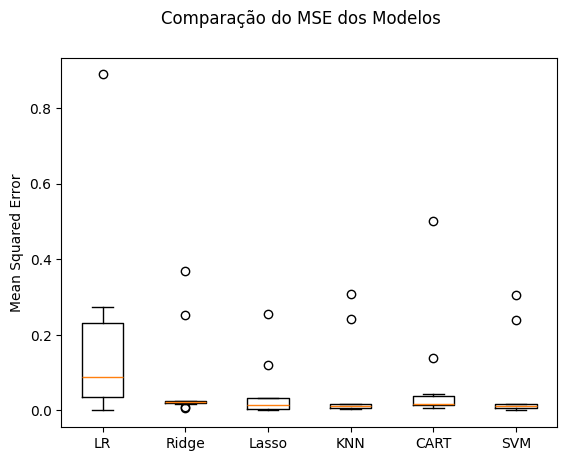

In [213]:
np.random.seed(7)

models = []
results = []
names = []

models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    mse_results = np.abs(cv_results)
    results.append(mse_results)
    names.append(name)
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, mse_results.mean(), mse_results.std(), np.sqrt(mse_results.mean()))
    print(msg)

fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.ylabel('Mean Squared Error')
plt.show()


O gráfico compara o Mean Squared Error (MSE) de diferentes modelos de regressão, indicando o desempenho e a variabilidade dos resultados. Modelos como Linear Regression (LR), Ridge e SVM apresentam os menores valores médios de MSE, sugerindo maior precisão. Além disso, esses modelos mostram menor dispersão, o que indica maior estabilidade nos resultados.

Por outro lado, modelos como CART e KNN apresentam maior variabilidade e outliers, sugerindo que podem ser mais sensíveis aos dados ou menos robustos.

Com base no equilíbrio entre precisão e estabilidade, o modelo SVM é uma excelente escolha, seguido por Ridge e LR. O SVM combina baixo MSE e alta robustez, sendo ideal para cenários onde pequenas variações nos resultados são críticas.

## **4. OTIMIZAÇÃO DO MODELO**
---

Começamos com a divisão novamente dos dados em treino e teste, seguindo por realizar uma busca em grade para otimizar os hiperparâmetros do modelo SVM (usando validação cruzada) e identifica os melhores parâmetros com base no menor MSE negativo.

Optamos por utilizar a validação cruzada porque ela permite avaliar o desempenho do modelo de forma mais confiável, especialmente quando a quantidade de dados não é muito grande. Dividindo o dataset em múltiplas partes (folds), conseguimos medir como o modelo generaliza para dados nunca vistos, reduzindo o risco de overfitting.

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_model = SVR()
grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error')
grid_svm.fit(X_train, y_train)

print(f"Melhores parâmetros SVM: {grid_svm.best_params_}")
print(f"Melhor MSE SVM: {-grid_svm.best_score_}")

Melhores parâmetros SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor MSE SVM: 0.016700056753422943


Realizamos uma busca em grade para otimizar o hiperparâmetro alpha do modelo Ridge Regression, utilizando validação cruzada e o MSE negativo como métrica, identificando o valor de alpha que minimiza o erro.

In [215]:
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]
}


ridge_model = Ridge()
grid_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)

print(f"Melhores parâmetros Ridge: {grid_ridge.best_params_}")
print(f"Melhor MSE Ridge: {-grid_ridge.best_score_}")

Melhores parâmetros Ridge: {'alpha': 1}
Melhor MSE Ridge: 0.01718043526238089


In [216]:
models = {
    'SVM': SVR(C=1.0, kernel='rbf'),
    'Ridge': Ridge(alpha=1.0),
    'LR': LinearRegression()
}

def evaluate_models(models, X_train, y_train):
    results = []
    scoring_mse = 'neg_mean_squared_error'
    scoring_r2 = make_scorer(r2_score)

    print("Comparação de Modelos:\n")
    for name, model in models.items():

        cv_results_mse = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_mse)
        mse_mean = np.abs(cv_results_mse.mean())
        mse_std = cv_results_mse.std()

        cv_results_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring_r2)
        r2_mean = cv_results_r2.mean()

        results.append({
            'Modelo': name,
            'MSE Médio': mse_mean,
            'Desvio Padrão MSE': mse_std,
            'R² Médio': r2_mean
        })

        print(f"{name}:")
        print(f"  MSE Médio: {mse_mean:.4f}")
        print(f"  Desvio Padrão do MSE: {mse_std:.4f}")
        print(f"  R² Médio: {r2_mean:.4f}")
        print()

    return results

results = evaluate_models(models, X_train, y_train)

import pandas as pd
results_df = pd.DataFrame(results)
print("\nTabela Comparativa:")
print(results_df)

Comparação de Modelos:

SVM:
  MSE Médio: 0.0167
  Desvio Padrão do MSE: 0.0067
  R² Médio: -2.0972

Ridge:
  MSE Médio: 0.0172
  Desvio Padrão do MSE: 0.0090
  R² Médio: -1.4502

LR:
  MSE Médio: 0.0250
  Desvio Padrão do MSE: 0.0057
  R² Médio: -5.7472


Tabela Comparativa:
  Modelo  MSE Médio  Desvio Padrão MSE  R² Médio
0    SVM   0.016700           0.006690 -2.097185
1  Ridge   0.017180           0.008952 -1.450172
2     LR   0.024973           0.005704 -5.747152


O Ridge é o modelo mais indicado, pois apresenta o menor MSE Médio e o R² menos negativo, mesmo considerando o cenário de dados com possível dificuldade de ajuste. Para melhorar o desempenho vamos tentar refinar os hiperparâmetros do modelo, ex.: testar valores de alpha e solver:


In [217]:
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}

ridge_model = Ridge()

grid_search = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor MSE (negativo): {grid_search.best_score_}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Melhores parâmetros: {'alpha': 1, 'solver': 'lsqr'}
Melhor MSE (negativo): -0.01718002750959999


Podemos notar o problema de underfitting pelos valores baixos de R² (próximos ou abaixo de 0) no desempenho dos modelos testados, como Linear Regression, Ridge e até o SVM (mesmo após otimização). Esses valores indicam que os modelos não conseguem capturar adequadamente a complexidade dos padrões nos dados, sugerindo que as relações entre as variáveis preditoras e a variável-alvo não estão sendo bem modeladas.

Buscamos métodos mais complexos para resolver esse problema, como os modelos em árvore, mas não obtivemos resultados satisfatórios:

In [218]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} -> MSE: {mse:.4f}, R²: {r2:.4f}")

results_df = pd.DataFrame(results).T
print("\nDesempenho dos Modelos Baseados em Árvores:")
print(results_df)

Random Forest -> MSE: 0.1179, R²: -0.6534
Gradient Boosting -> MSE: 0.1113, R²: -0.5602
XGBoost -> MSE: 0.1066, R²: -0.4945

Desempenho dos Modelos Baseados em Árvores:
                        MSE        R²
Random Forest      0.117946 -0.653360
Gradient Boosting  0.111302 -0.560213
XGBoost            0.106617 -0.494549


Testamos também o método de stacking: Usar um metamodelo (por exemplo, uma regressão linear ou Ridge) para combinar as previsões de diferentes modelos básicos, como SVM, Ridge e Random Forest, que também não solucionou a questão do R² negativo.

In [219]:
base_models = [
    ('ridge', Ridge(alpha=1.0)),
    ('svm', SVR(C=1.0, kernel='rbf')),
    ('rf', RandomForestRegressor())
]

stack = StackingRegressor(estimators=base_models, final_estimator=Ridge())

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)
print("MSE do ensemble:", mean_squared_error(y_test, y_pred_stack))
print("R² do ensemble:", r2_score(y_test, y_pred_stack))


MSE do ensemble: 0.13019789217853464
R² do ensemble: -0.8250988281136473


## **5. VALIDAÇÃO DE RESULTADOS**
---
Com o modelo otimizado criado, vamos treiná-lo:


In [220]:
best_ridge = grid_search.best_estimator_

best_ridge.fit(X_train, y_train)

y_pred = best_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE no teste: {mse:.4f}")
print(f"R² no teste: {r2:.4f}")


MSE no teste: 0.1653
R² no teste: -1.3172


Apesar de todos os ajustes, podemos perceber pelas métricas resultantes e pelos gráficos a seguir que o modelo ainda precisa ser ajustado:

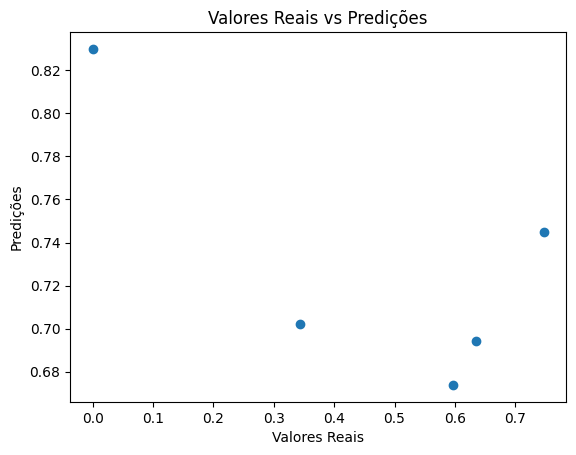

In [221]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Predições')
plt.title('Valores Reais vs Predições')
plt.show()

Este gráfico mostra a relação entre os valores reais e as predições realizadas pelo modelo SVM otimizado. A dispersão dos pontos em relação à linha ideal (diagonal) reflete o quanto as predições do modelo estão próximas dos valores reais. Embora alguns pontos estejam alinhados com a linha, observa-se um desvio significativo para alguns dados, indicando que o modelo apresenta boa precisão em alguns casos, mas ainda enfrenta dificuldades em capturar totalmente a variância dos dados.

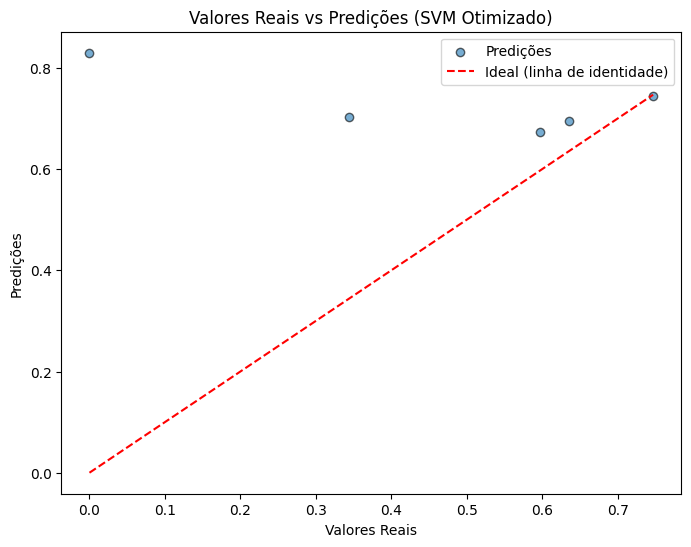

In [222]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Predições")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal (linha de identidade)")
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.title("Valores Reais vs Predições (SVM Otimizado)")
plt.legend()
plt.show()


Este gráfico aprimorado inclui uma linha de identidade (vermelha) para facilitar a comparação visual entre os valores reais e as predições. A proximidade dos pontos em relação à linha sugere que o modelo captura bem as relações em algumas regiões, mas as discrepâncias para pontos mais afastados evidenciam limitações no ajuste, especialmente em casos extremos. Isso reforça a necessidade de explorar mais ajustes ou avaliar possíveis melhorias nas features.

## **CONCLUSÕES**

---

Este projeto abordou um desafio real de prever o número de views/impressões de campanhas na creator economy, utilizando um modelo de regressão supervisionada treinado em variáveis explicativas que capturam aspectos-chave. Foi necessário lidar com a imprevisibilidade de dados reais e acomodar essa variação.

Após testar diferentes algoritmos de machine learning, o Ridge foi identificado como o modelo mais adequado, apresentando o menor Mean Squared Error (MSE) na validação cruzada (0.1653), apesar de um R² negativo (-1.3172 no teste). Esses resultados indicam que o modelo é capaz de capturar padrões relevantes entre as variáveis, mas ainda enfrenta limitações para explicar a variância total dos dados.

1. O Ridge otimizado destacou-se como o modelo mais robusto, superando alternativas como SVM e Regressão Linear.

2. Apesar do bom ajuste no MSE, o R² positivo sugere que o modelo captura parcialmente a relação entre as variáveis, possivelmente devido a ruídos ou fatores não incluídos no dataset.

3. O modelo ainda não oferece uma base preditiva robusta para decisões mais embasadas, permitindo que marcas estimem a performance de campanhas com criadores antes de sua execução.

4. Variáveis como protagonismo do produto e assertividade em microcomunidades demonstraram ser relevantes no desempenho, reforçando a importância de campanhas direcionadas. Mas outras precisam ser adicionadas a conta para que ela seja assertiva.

5. O modelo depende diretamente da qualidade dos dados. Algumas variáveis qualitativas, como a assertividade em microcomunidades, podem ser refinadas ou substituídas por métricas mais objetivas.

6. Próximos Passos:
Aprimoramento do Dataset, expandindo a base de dados com novas variáveis, como sazonalidade, hashtags e contexto do criador, pode aumentar a precisão das previsões. E realizar novos testes com outras abordagens, como Random Forest ou XGBoost, para capturar interações não lineares adicionais.

7. Implementação Prática: Integrar o modelo a um sistema de suporte à decisão para que marcas possam utilizá-lo de forma dinâmica em suas campanhas.

Este projeto fornece uma base sólida para a previsão de performance na creator economy e demonstra que um modelo preditivo pode ser uma ferramenta poderosa para maximizar o impacto de campanhas.